In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# with open("train_data.txt") as f:
#     content = f.readlines()

# content

In [3]:
with open("train_data.txt", encoding="utf8") as f:
    train_content = f.readlines()

with open("test_data_solution.txt", encoding="utf8") as f:
    content_test = f.readlines()

train = pd.DataFrame([element.split(":::") for element in train_content], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

test = pd.DataFrame([element.split(":::") for element in content_test], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

In [4]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION
19258,Ang pagbabalik ni Leon Guerrero (1980),action,"Leon Guererro is a legend, a hero in that lit..."
20297,Ahava Tzeira (1987),comedy,When his parents are on a holiday Johnny invi...
7917,Home (2009/II),documentary,"York, Pennsylvania has long been the quintess..."
32613,Meyer aus Berlin (1919),comedy,"A bumbling, self-indulgent husband played by ..."
52829,Beehad - The Ravine (2013),drama,"In Northern parts of India-Uttar Pradesh, Mad..."


In [5]:
test.sample(5)

,TITLE,GENRE,DESCRIPTION
25463,"""Transplants"" (2017)",comedy,"Bri and Trey are the classic ""New Yorker"" ste..."
34366,The face next to you (2016),horror,Xitian is haunted by the same dream for the p...
43037,Her Bitter Cup (1916),drama,Rethna works hard to organize her fellow fact...
39599,Boyhood (2014/I),drama,"Filmed over 12 years with the same cast, 'Ric..."
24673,Pure McCartney (2013),music,Pure McCartney contains a recording of a one-...


In [6]:
train.isna().sum(),test.isna().sum()

(TITLE          0
 GENRE          0
 DESCRIPTION    0
 dtype: int64,
 TITLE          0
 GENRE          0
 DESCRIPTION    0
 dtype: int64)

In [7]:
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

In [8]:
test["GENRE"].value_counts()

GENRE
 drama           13612
 documentary     13096
 comedy           7446
 short            5072
 horror           2204
 thriller         1590
 action           1314
 western          1032
 reality-tv        883
 family            783
 adventure         775
 music             731
 romance           672
 sci-fi            646
 adult             590
 crime             505
 animation         498
 sport             431
 talk-show         391
 fantasy           322
 mystery           318
 musical           276
 biography         264
 history           243
 game-show         193
 news              181
 war               132
Name: count, dtype: int64

In [9]:
train["GENRE"].value_counts()

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

***<h1>Class imbalance</h1>***

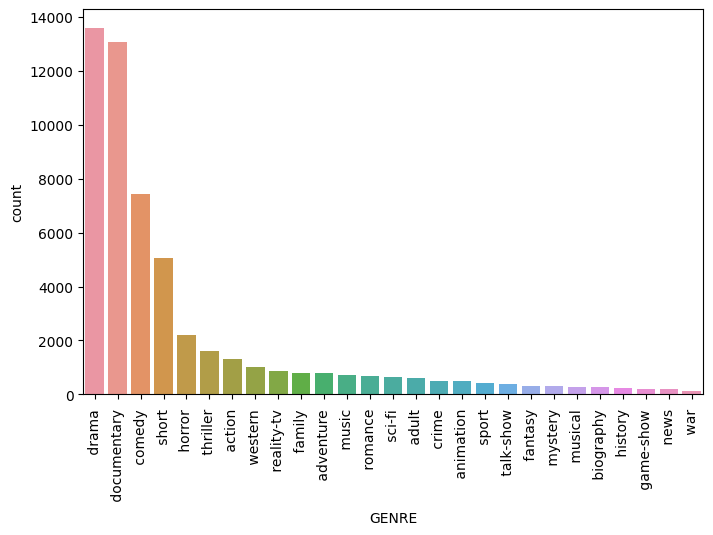

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=train["GENRE"].value_counts().index, y=train["GENRE"].value_counts())
plt.xticks(rotation=90)
plt.show()

In [11]:
#if any gerne greater than 1000 then select randomly 1000 from it
# train = train.groupby('GENRE').apply(lambda x: x.sample(1000).reset_index(drop=True) if len(x) > 1000 else x).reset_index(drop=True)

In [12]:
from nltk.stem import PorterStemmer
stammer = PorterStemmer()

In [13]:
import re


def clean_title(text):

    # applied slicing but all the rows are not in the same format
    # text = text[:-7]

    # hence applt split wich will split the string at "(" and take the first part which is the actual title
    text = text.split("(")[0]
    text = text.strip()
    # removing all the special characters and converting the text to upper case
    # only alphabets and numbers and single quote are allowed
    text = re.sub(r'[^\'a-zA-Z0-9\s]', '', text)
    text = text.upper()

    return text


def clean_desc(text):

    # removed all the special characters and converted the text to lower case
    text = re.sub(r'[^\'a-zA-Z0-9\s]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = text.strip()

    # stemming the words: eg - running, ran, run -> run
    # text = ' '.join([stammer.stem(word) for word in text.split()])
    if len(text) > 600:
        text = text[:600]

    return text

In [14]:
len(train),len(test)

(54214, 54200)

In [15]:
train["TITLE"] = train["TITLE"].apply(clean_title)
test["TITLE"] = test["TITLE"].apply(clean_title)
train["DESCRIPTION"] = train["DESCRIPTION"].apply(clean_desc)
test["DESCRIPTION"] = test["DESCRIPTION"].apply(clean_desc)

In [16]:
train

,TITLE,GENRE,DESCRIPTION
0,OSCAR ET LA DAME ROSE,drama,listening in to a conversation between his doc...
1,CUPID,thriller,a brother and sister with a past incestuous re...
2,YOUNG WILD AND WONDERFUL,adult,as the bus empties the students for their fiel...
3,THE SECRET SIN,drama,to help their unemployed father make ends meet...
4,THE UNRECOVERED,drama,the film's title refers not only to the un rec...
...,...,...,...
54209,BONINO,comedy,this short lived nbc live sitcom centered on b...
54210,DEAD GIRLS DON'T CRY,horror,the next generation of exploitation the sister...
54211,RONALD GOEDEMONDT ZE BESTAAN ECHT,documentary,ze bestaan echt is a stand up comedy about gro...
54212,MAKE YOUR OWN BED,comedy,walter and vivian live in the country and have...


In [17]:
train["input"] = train["TITLE"] + " " + train["DESCRIPTION"]
test["input"] = test["TITLE"] + " " + test["DESCRIPTION"]

In [18]:
train

,TITLE,GENRE,DESCRIPTION,input
0,OSCAR ET LA DAME ROSE,drama,listening in to a conversation between his doc...,OSCAR ET LA DAME ROSE listening in to a conver...
1,CUPID,thriller,a brother and sister with a past incestuous re...,CUPID a brother and sister with a past incestu...
2,YOUNG WILD AND WONDERFUL,adult,as the bus empties the students for their fiel...,YOUNG WILD AND WONDERFUL as the bus empties th...
3,THE SECRET SIN,drama,to help their unemployed father make ends meet...,THE SECRET SIN to help their unemployed father...
4,THE UNRECOVERED,drama,the film's title refers not only to the un rec...,THE UNRECOVERED the film's title refers not on...
...,...,...,...,...
54209,BONINO,comedy,this short lived nbc live sitcom centered on b...,BONINO this short lived nbc live sitcom center...
54210,DEAD GIRLS DON'T CRY,horror,the next generation of exploitation the sister...,DEAD GIRLS DON'T CRY the next generation of ex...
54211,RONALD GOEDEMONDT ZE BESTAAN ECHT,documentary,ze bestaan echt is a stand up comedy about gro...,RONALD GOEDEMONDT ZE BESTAAN ECHT ze bestaan e...
54212,MAKE YOUR OWN BED,comedy,walter and vivian live in the country and have...,MAKE YOUR OWN BED walter and vivian live in th...


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["target"] = le.fit_transform(train["GENRE"])
test["target"] = le.transform(test["GENRE"])

In [20]:
train

,TITLE,GENRE,DESCRIPTION,input,target
0,OSCAR ET LA DAME ROSE,drama,listening in to a conversation between his doc...,OSCAR ET LA DAME ROSE listening in to a conver...,8
1,CUPID,thriller,a brother and sister with a past incestuous re...,CUPID a brother and sister with a past incestu...,24
2,YOUNG WILD AND WONDERFUL,adult,as the bus empties the students for their fiel...,YOUNG WILD AND WONDERFUL as the bus empties th...,1
3,THE SECRET SIN,drama,to help their unemployed father make ends meet...,THE SECRET SIN to help their unemployed father...,8
4,THE UNRECOVERED,drama,the film's title refers not only to the un rec...,THE UNRECOVERED the film's title refers not on...,8
...,...,...,...,...,...
54209,BONINO,comedy,this short lived nbc live sitcom centered on b...,BONINO this short lived nbc live sitcom center...,5
54210,DEAD GIRLS DON'T CRY,horror,the next generation of exploitation the sister...,DEAD GIRLS DON'T CRY the next generation of ex...,13
54211,RONALD GOEDEMONDT ZE BESTAAN ECHT,documentary,ze bestaan echt is a stand up comedy about gro...,RONALD GOEDEMONDT ZE BESTAAN ECHT ze bestaan e...,7
54212,MAKE YOUR OWN BED,comedy,walter and vivian live in the country and have...,MAKE YOUR OWN BED walter and vivian live in th...,5


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(2, 3))
train_features = tfidf.fit_transform(train["input"])
test_features = tfidf.transform(test["input"])

In [30]:
train_features.shape, test_features.shape

((54214, 10000), (54200, 10000))

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features, train["target"])

c:\Users\Pankil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

# mnb.fit(train_features, train["target"])
# gnb.fit(train_features.toarray(), train["target"])
bnb.fit(train_features, train["target"])

BernoulliNB()

In [38]:
gnb.score(test_features.toarray(), le.transform(test["GENRE"]))

0.29267527675276755

In [40]:
bnb.score(test_features, le.transform(test["GENRE"]))

0.4634317343173432

In [ ]:
model.score(test_features, le.transform(test["GENRE"])),mnb.score(test_features, le.transform(test["GENRE"]))

<strong><h4>- Model Scores</h4></strong>
<strong><h4>Gaussian Naive bias score: <span style="color: rgb(235, 221, 68);font-weight: bolder;">0.3774785575947616</span></h4></strong>
<strong><h4>Multinomial Naive bias score: <span style="color: rgb(235, 221, 68);font-weight: bolder;">0.4838144424974638</span></h4></strong>
<strong><h4>Logistic Regression score: <span style="color: rgb(235, 221, 68);font-weight: bolder;">0.5859079590519229</span></h4></strong><strong><h4>Random Forest Classifier score: <span style="color: rgb(235, 221, 68);font-weight: bolder;">0.49580374435119434</span></h4></strong>


In [25]:
#import csv ignoring the errors 

# train.to_csv("train_data.csv", index=False, encoding='utf-8', errors='ignore')